In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
df = pd.read_csv('BreadBasket_DMS.csv')

In [2]:
df.head()

,Date,Time,Transaction,Item
0,30-10-2016,09:58:11,1,Bread
1,30-10-2016,10:05:34,2,Scandinavian
2,30-10-2016,10:05:34,2,Scandinavian
3,30-10-2016,10:07:57,3,Hot chocolate
4,30-10-2016,10:07:57,3,Jam


In [3]:
df['Item'] = df['Item'].str.strip()

In [4]:

df['Quantity'] = np.random.randint(1, 5, df.shape[0])

In [5]:
df.head()

,Date,Time,Transaction,Item,Quantity
0,30-10-2016,09:58:11,1,Bread,1
1,30-10-2016,10:05:34,2,Scandinavian,2
2,30-10-2016,10:05:34,2,Scandinavian,1
3,30-10-2016,10:07:57,3,Hot chocolate,4
4,30-10-2016,10:07:57,3,Jam,3


In [6]:
grouping = (df.groupby(['Transaction','Item'])['Quantity']
           .sum().unstack().reset_index().fillna(0)
           .set_index('Transaction')) 

In [7]:
grouping.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [9]:
grouping_sets = grouping.applymap(encode_units)
#grouping_sets.drop('POSTAGE', inplace=True, axis=1)
grouping_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SUPPORT 0.01

In [10]:
frequent_itemsets = apriori(grouping_sets, min_support=0.01, use_colnames=True)

In [11]:
rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [25]:
rules_1.to_csv('rules_1.csv')

In [26]:
temp = pd.read_csv('rules_1.csv')
temp.head()


,Id,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1,frozenset({'Coffee'}),frozenset({'Alfajores'}),0.475081,0.036093,0.019515,0.041078,1.138116,0.002368,1.005199
1,2,frozenset({'Alfajores'}),frozenset({'Coffee'}),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,3,frozenset({'Bread'}),frozenset({'Pastry'}),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
3,4,frozenset({'Pastry'}),frozenset({'Bread'}),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
4,5,frozenset({'Coffee'}),frozenset({'Brownie'}),0.475081,0.039765,0.019515,0.041078,1.033013,0.000624,1.001369


C:\Users\Siddhesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


No handles with labels found to put in legend.


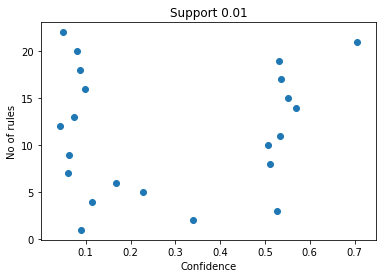

In [68]:
#abc_1.plot(kind='line')
plt.title('Support 0.01')
plt.legend().remove()
plt.xlabel('Confidence')
plt.ylabel('No of rules')
#plt.bar(abc_1[0], abc_1[1])
#sns.countplot(x = 'confidence', data = rules_1 )
plt.scatter(temp['confidence'], temp['Id'])

SUPPORT 0.02

In [39]:
frequent_itemsets = apriori(grouping_sets, min_support=0.02, use_colnames=True)

In [40]:
rules_2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [41]:
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Pastry),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
1,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
2,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
3,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
4,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146


In [42]:
rules_2.to_csv('rules_2.csv')

In [46]:
temp_2 = pd.read_csv('rules_2.csv')
temp_2.head()

,Id,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1,frozenset({'Bread'}),frozenset({'Pastry'}),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
1,2,frozenset({'Pastry'}),frozenset({'Bread'}),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
2,3,frozenset({'Cake'}),frozenset({'Coffee'}),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
3,4,frozenset({'Coffee'}),frozenset({'Cake'}),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
4,5,frozenset({'Cake'}),frozenset({'Tea'}),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146


No handles with labels found to put in legend.


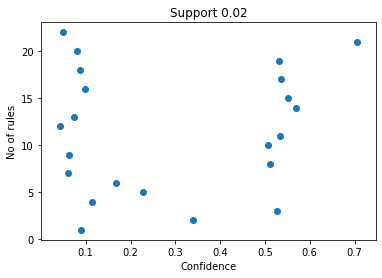

In [69]:
#abc_1.plot(kind='line')
plt.title('Support 0.02')
plt.legend().remove()
plt.xlabel('Confidence')
plt.ylabel('No of rules')
#plt.bar(abc_1[0], abc_1[1])
#sns.countplot(x = 'confidence', data = rules_1 )
plt.scatter(temp_2['confidence'], temp_2['Id'])

SUPPORT 0.03

In [48]:
frequent_itemsets = apriori(grouping_sets, min_support=0.03, use_colnames=True)
rules_3 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [49]:
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
1,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
2,(Coffee),(Medialuna),0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129
3,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
4,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
5,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402
6,(Puff),(Coffee),0.076802,0.475081,0.041234,0.536885,1.130091,0.004747,1.133453
7,(Coffee),(Puff),0.475081,0.076802,0.041234,0.086793,1.130091,0.004747,1.010941
8,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
9,(Coffee),(Sandwich),0.475081,0.071346,0.037981,0.079947,1.120551,0.004086,1.009348


In [50]:
rules_3.to_csv('rules_3.csv')

In [51]:
temp_3 = pd.read_csv('rules_3.csv')

No handles with labels found to put in legend.


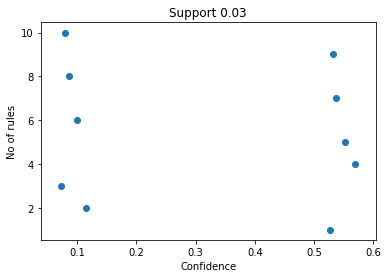

In [75]:
#abc_1.plot(kind='line')
plt.title('Support 0.03')
plt.legend().remove()
plt.xlabel('Confidence')
plt.ylabel('No of rules')
#plt.bar(abc_1[0], abc_1[1])
#sns.countplot(x = 'confidence', data = rules_1 )
plt.scatter(temp_3['confidence'], temp_3['Id'])

SUPPORT 0.04

In [54]:
frequent_itemsets = apriori(grouping_sets, min_support=0.04, use_colnames=True)

rules_4 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [55]:
rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
1,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
2,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
3,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402
4,(Puff),(Coffee),0.076802,0.475081,0.041234,0.536885,1.130091,0.004747,1.133453
5,(Coffee),(Puff),0.475081,0.076802,0.041234,0.086793,1.130091,0.004747,1.010941


In [56]:
rules_4.to_csv('rules_4.csv')

In [58]:
temp_4 = pd.read_csv('rules_4.csv')
temp_4.head()

,Id,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1,frozenset({'Cake'}),frozenset({'Coffee'}),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
1,2,frozenset({'Coffee'}),frozenset({'Cake'}),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
2,3,frozenset({'Pastry'}),frozenset({'Coffee'}),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
3,4,frozenset({'Coffee'}),frozenset({'Pastry'}),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402
4,5,frozenset({'Puff'}),frozenset({'Coffee'}),0.076802,0.475081,0.041234,0.536885,1.130091,0.004747,1.133453


No handles with labels found to put in legend.


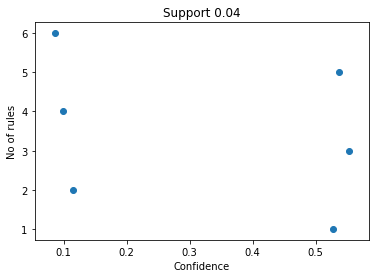

In [71]:
#abc_1.plot(kind='line')
plt.title('Support 0.04')
plt.legend().remove()
plt.xlabel('Confidence')
plt.ylabel('No of rules')
#plt.bar(abc_1[0], abc_1[1])
#sns.countplot(x = 'confidence', data = rules_1 )
plt.scatter(temp_4['confidence'], temp_4['Id'])

SUPPORT 0.05

In [60]:
frequent_itemsets = apriori(grouping_sets, min_support=0.05, use_colnames=True)

rules_5 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [61]:
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.00535,1.109667
1,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.00535,1.012717


In [63]:
 rules_5.to_csv('rules_5.csv')

In [66]:
temp_5 = pd.read_csv('rules_5.csv')

No handles with labels found to put in legend.


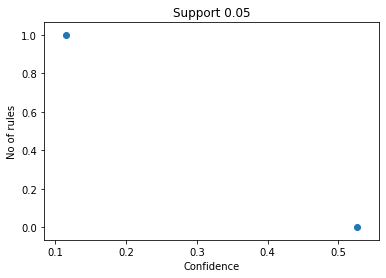

In [72]:
#abc_1.plot(kind='line')
plt.title('Support 0.05')
plt.legend().remove()
plt.xlabel('Confidence')
plt.ylabel('No of rules')
#plt.bar(abc_1[0], abc_1[1])
#sns.countplot(x = 'confidence', data = rules_1 )
plt.scatter(temp_5['confidence'], temp_5['Id'])